In [ ]:
# Mounting GDRIVE
from google.colab import drive 
drive.mount('/mntDrive') 

Mounted at /mntDrive


In [ ]:
#Install Required packages
!pip install keras
!pip install keras_applications==1.0.4 --no-deps
!pip install keras_preprocessing==1.0.2 --no-deps
!pip install h5py==2.8.0
!pip install tensorflow
!pip install mtcnn

In [ ]:
!pip install keras_vggface

In [ ]:
#Import required packages
import random
import os
import cv2
from cv2 import resize
import numpy as np
import tensorflow as tf
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import mtcnn

In [ ]:
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace

In [ ]:
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16
from scipy.spatial.distance import cosine

# Face Preprocessing

Accessing Google Drive Files

In [ ]:
# load the image
img = load_img('/content/drive/My Drive/Face_Recognition/Puja/puja_1.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

OSError: ignored

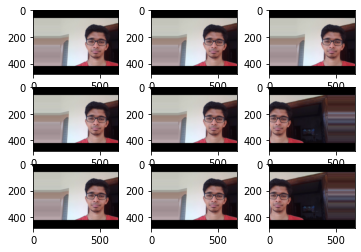

In [ ]:
#1.Horizontal Shift Image
img = load_img('/content/drive/My Drive/Face_Recognition/Aravindh/aravindh_1.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

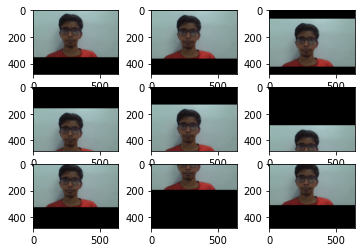

In [ ]:
#2.Vertical Shift Image
img = load_img('/content/drive/My Drive/Face_Recognition/Aravindh/aravindh_10.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

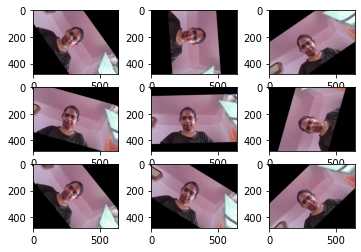

In [ ]:
#3.Random Rotation
img = load_img('/content/drive/My Drive/Face_Recognition/Puja/puja_3.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

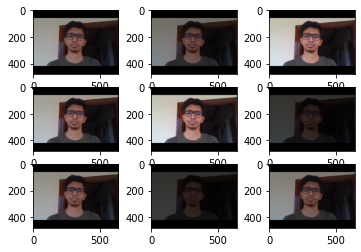

In [ ]:
#4.Random Brightness
img = load_img('/content/drive/My Drive/Face_Recognition/Aravindh/aravindh_4.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

Files are in /content/drive/My Drive/Face_Recognition

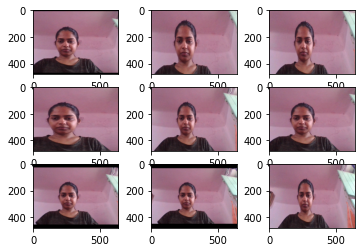

In [ ]:
#5.Random Crop
img = load_img('/content/drive/My Drive/Face_Recognition/Puja/puja_2.png')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# **Face** **Detection**

**Face Detection & Recogntion**

In [ ]:
#Install required packages one by one
#pip install matplotlib
#pip install keras
#pip install mtcnn
#pip install keras_vggface

In [ ]:
#Import Required Packages
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

In [ ]:
#Read an image
image = plt.imread('/mntDrive/My Drive/Face_Recognition/Aravindh/aravindh_2.jpg')
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    print(face)

{'box': [210, 166, 152, 198], 'confidence': 0.9999983310699463, 'keypoints': {'left_eye': (251, 242), 'right_eye': (326, 246), 'nose': (285, 279), 'mouth_left': (252, 312), 'mouth_right': (318, 317)}}


Shape of image/array: (480, 640, 3)


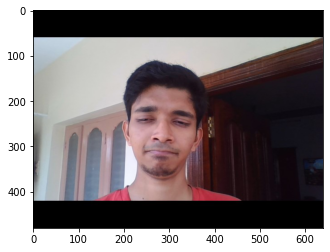

In [ ]:
import matplotlib.pyplot as plt
# load image from file
filename = '/mntDrive/My Drive/Face_Recognition/Aravindh/aravindh_2.jpg'
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

In [ ]:
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [210, 166, 152, 198], 'confidence': 0.9999983310699463, 'keypoints': {'left_eye': (251, 242), 'right_eye': (326, 246), 'nose': (285, 279), 'mouth_left': (252, 312), 'mouth_right': (318, 317)}}


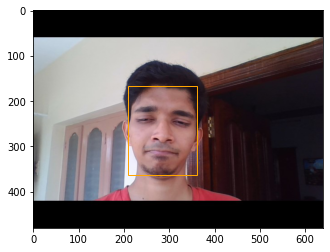

In [ ]:
def draw_facebox(filename, result_list):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height, fill=False, color='orange')
        ax.add_patch(rect)
    plt.show()
 
# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
# pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

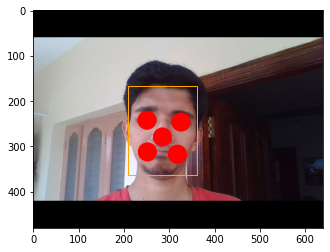

In [ ]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height,fill=False, color='orange')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = plt.Circle(value, radius=20, color='red')
            ax.add_patch(dot)
            # show the plot
        plt.show()
 
# filename = 'test1.jpg' # filename is defined above, otherwise uncomment
# load image from file
# pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
#detector = mtcnn.MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

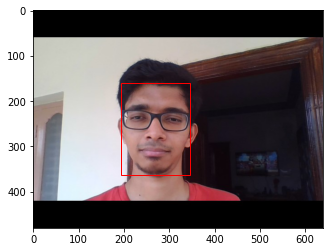

In [ ]:
# Face Detection:
#Image 1
file = '/mntDrive/My Drive/Face_Recognition/Aravindh/aravindh_1.jpg'
image = plt.imread(file)
detector = MTCNN()
faces = detector.detect_faces(image)

def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()
highlight_faces(file, faces)

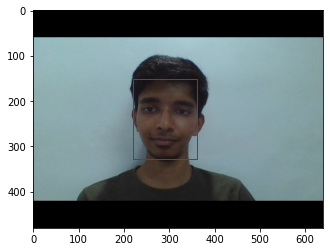

In [ ]:
# Face Detection:
#Image 2
file = '/mntDrive/My Drive/Face_Recognition/Aravindh/aravindh_14.jpg'
image = plt.imread(file)
detector = MTCNN()
faces = detector.detect_faces(image)

def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()
highlight_faces(file, faces)

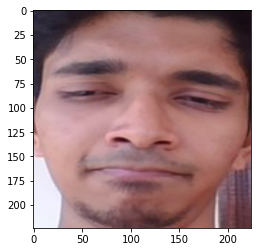

In [ ]:
from numpy import asarray
from PIL import Image

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face = extract_face_from_image(filename)

# Display the first face from the extracted faces
plt.imshow(extracted_face[0])
plt.show()

# Face Recognition

**Using VGGFace in Keras**

**Face Extraction using DLIB**

In [ ]:
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2 
!bzip2 -dk mmod_human_face_detector.dat.bz2 

--2020-08-25 07:53:28--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2.2’

mmod_human_face_det 100%[===================>] 678.43K  1.28MB/s    in 0.5s    

2020-08-25 07:53:29 (1.28 MB/s) - ‘mmod_human_face_detector.dat.bz2.2’ saved [694709/694709]

bzip2: Output file mmod_human_face_detector.dat already exists.


In [ ]:
import dlib
dnnFaceDetector=dlib.cnn_face_detection_model_v1("/mntDrive/My Drive/Face_Recognition/mmod_human_face_detector.dat")

In [ ]:
#Aravindh
import cv2
import dlib

# Load cnn_face_detector with 'mmod_face_detector'
dnnFaceDetector=dlib.cnn_face_detection_model_v1("/mntDrive/My Drive/Face_Recognition/mmod_human_face_detector.dat")

# Load image 
img=cv2.imread('/mntDrive/My Drive/Face_Recognition/Aravindh/aravindh_23.jpg')

# Convert to gray scale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  		
# Find faces in image
rects=dnnFaceDetector(gray,1)
left,top,right,bottom=0,0,0,0

# For each face 'rect' provides face location in image as pixel loaction
for (i,rect) in enumerate(rects):
  left=rect.rect.left() #x1
  top=rect.rect.top() #y1
  right=rect.rect.right() #x2
  bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top

  # Crop image 
  img_crop=img[top:top+height,left:left+width]

  #save crop image with person name as image name 
  cv2.imwrite('/mntDrive/My Drive/Face_Recognition/Cropped/Aravindh/aravindh_23.jpg',img_crop)

In [ ]:
#Kasthuri
import cv2
import dlib

# Load cnn_face_detector with 'mmod_face_detector'
dnnFaceDetector=dlib.cnn_face_detection_model_v1("/mntDrive/My Drive/Face_Recognition/mmod_human_face_detector.dat")

# Load image 
img=cv2.imread('/mntDrive/My Drive/Face_Recognition/Kasthuri/kasthuri_5.png')

# Convert to gray scale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  		
# Find faces in image
rects=dnnFaceDetector(gray,1)
left,top,right,bottom=0,0,0,0

# For each face 'rect' provides face location in image as pixel loaction
for (i,rect) in enumerate(rects):
  left=rect.rect.left() #x1
  top=rect.rect.top() #y1
  right=rect.rect.right() #x2
  bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top

  # Crop image 
  img_crop=img[top:top+height,left:left+width]

  #save crop image with person name as image name 
  cv2.imwrite('/mntDrive/My Drive/Face_Recognition/Cropped/Kasthuri/kasthuri_5.jpg',img_crop)

In [ ]:
#Puja
import cv2
import dlib

# Load cnn_face_detector with 'mmod_face_detector'
dnnFaceDetector=dlib.cnn_face_detection_model_v1("/mntDrive/My Drive/Face_Recognition/mmod_human_face_detector.dat")

# Load image 
img=cv2.imread('/mntDrive/My Drive/Face_Recognition/Puja/puja_4.png')

# Convert to gray scale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  		
# Find faces in image
rects=dnnFaceDetector(gray,1)
left,top,right,bottom=0,0,0,0

# For each face 'rect' provides face location in image as pixel loaction
for (i,rect) in enumerate(rects):
  left=rect.rect.left() #x1
  top=rect.rect.top() #y1
  right=rect.rect.right() #x2
  bottom=rect.rect.bottom() #y2
  width=right-left
  height=bottom-top

  # Crop image 
  img_crop=img[top:top+height,left:left+width]

  #save crop image with person name as image name 
  cv2.imwrite('/mntDrive/My Drive/Face_Recognition/Cropped/Puja/puja_4.jpg',img_crop)

**Face Classifier**

In [ ]:
!gdown  https://drive.google.com/ucid=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo 

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=None
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/ucid=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
To: /content/ucid=1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo
100% 83.5k/83.5k [00:00<00:00, 77.5MB/s]


In [ ]:
# Tensorflow version == 2.0.0
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import ZeroPadding2D,Convolution2D,MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Softmax,Flatten,Activation,BatchNormalization
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import tensorflow.keras.backend as K

# Define VGG_FACE_MODEL architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))	
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

# Load VGG Face model weights
model.load_weights('/mntDrive/My Drive/Face_Recognition/vgg_face_weights.h5')

In [ ]:
vgg_face=Model(inputs=model.layers[0].input,outputs=model.layers[-2].output) 

In [ ]:
# Prepare Train Data
path='/mntDrive/My Drive/Face_Recognition/'
x_train=[]
y_train=[]
person_rep=dict()
person_folders=os.listdir(path+'/Cropped/')
for i,person in enumerate(person_folders):
    person_rep[i]=person
    image_names=os.listdir(path+'/Cropped/'+person+'/')
    for image_name in image_names:
        img=load_img(path+'/Cropped/'+person+'/'+image_name,target_size=(224,224))
        img=img_to_array(img)
        img=np.expand_dims(img,axis=0)
        img=preprocess_input(img)
        img_encode=vgg_face(img)
        x_train.append(np.squeeze(K.eval(img_encode)).tolist())
        y_train.append(i)
    
# Prepare Test Data
        x_test=[]
        y_test=[]
        person_folders=os.listdir(path+'/Cropped_test/')
        test_image_names=os.listdir(path+'Cropped_test/'+person+'/')
        for image_name in test_image_names:
            img=load_img(path+'/Cropped_test/'+person+'/'+image_name,target_size=(224,224))
            img=img_to_array(img)
            img=np.expand_dims(img,axis=0)
            img=preprocess_input(img)
            img_encode=vgg_face(img)
            x_test.append(np.squeeze(K.eval(img_encode)).tolist())
            y_test.append(i)

In [ ]:
x_train=np.array(x_train) 
y_train=np.array(y_train)
x_test=np.array(x_test) 
y_test=np.array(y_test) 

In [ ]:
# Softmax regressor to classify images based on encoding 
classifier_model=Sequential()	
classifier_model.add(Dense(units=100,input_dim=x_train.shape[1],kernel_initializer='glorot_uniform'))		
classifier_model.add(BatchNormalization())		
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.3))
classifier_model.add(Dense(units=10,kernel_initializer='glorot_uniform'))
classifier_model.add(BatchNormalization())
classifier_model.add(Activation('tanh'))
classifier_model.add(Dropout(0.2))
classifier_model.add(Dense(units=6,kernel_initializer='he_uniform'))
classifier_model.add(Activation('softmax'))
classifier_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='nadam',metrics=['accuracy'])

In [ ]:
classifier_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
1/1 [==============================] - 0s 123ms/step - loss: 1.4007 - accuracy: 0.4074 - val_loss: 0.5539 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 0.7245 - accuracy: 0.8148 - val_loss: 0.5842 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 0.5483 - accuracy: 0.8889 - val_loss: 0.5056 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.4169 - accuracy: 0.9630 - val_loss: 0.3993 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.4752 - accuracy: 0.9259 - val_loss: 0.4515 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3589 - accuracy: 0.9630 - val_loss: 0.5246 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.3961 - accuracy: 1.0000 - val_loss: 0.5574 - val_accuracy: 1.0000
Epoch 8/100
1/1 [==

Path to image with file size < 100 kb ? /mntDrive/My Drive/Face_Recognition/Aravindh/aravindh_10.jpg
Person(s) in image is/are:
['Aravindh']


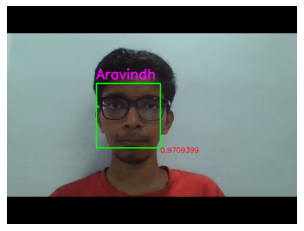

In [ ]:
# Label names for class numbers
person_rep={0:'Aravindh',
 1: 'Puja',
 2: 'Kasthuri'}

if __name__ == '__main__':
  file_path=input("Path to image with file size < 100 kb ? ")

  img=cv2.imread(file_path)
  if img is None or img.size is 0 :
    print("Please check image path or some error occured")

  else:
    persons_in_img=[]
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect Faces
    rects=dnnFaceDetector(gray,1)
    left,top,right,bottom=0,0,0,0
    for (i,rect) in enumerate(rects):
      # Extract Each Face
      left=rect.rect.left() #x1
      top=rect.rect.top() #y1
      right=rect.rect.right() #x2
      bottom=rect.rect.bottom() #y2
      width=right-left
      height=bottom-top
      img_crop=img[top:top+height,left:left+width]
      cv2.imwrite('/mntDrive/My Drive/Face_Recognition/Cropped_test/crop_img.jpg',img_crop)
    
      # Get Embeddings
      crop_img=load_img('/mntDrive/My Drive/Face_Recognition/Cropped_test/crop_img.jpg',target_size=(224,224))
      crop_img=img_to_array(crop_img)
      crop_img=np.expand_dims(crop_img,axis=0)
      crop_img=preprocess_input(crop_img)
      img_encode=vgg_face(crop_img)

      # Make Predictions
      embed=K.eval(img_encode)
      person=classifier_model.predict(embed)
      name=person_rep[np.argmax(person)]
      os.remove('/mntDrive/My Drive/Face_Recognition/Cropped_test/crop_img.jpg')
      cv2.rectangle(img,(left,top),(right,bottom),(0,255,0), 2)
      img=cv2.putText(img,name,(left,top-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,255),2,cv2.LINE_AA)
      img=cv2.putText(img,str(np.max(person)),(right,bottom+10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)
      persons_in_img.append(name)
    # Save images with bounding box,name and accuracy 
    cv2.imwrite('/mntDrive/My Drive/Face_Recognition/Cropped_test/recognized_img.jpg',img)
    
    #Person in image
    print('Person(s) in image is/are:')
    print(persons_in_img)

    plt.figure(figsize=(8,4))
    plt.imshow(img[:,:,::-1])
    plt.axis('off')
    plt.show()

In [ ]:
/mntDrive/My Drive/Face_Recognition/Aravindh/aravindh_10.jpg
/mntDrive/My Drive/Face_Recognition/Puja/puja_2.png